Problem Statement:

1)Building deep learning models requires taking design and architectural decisions which play an essential part in the performance of the resulting model.

2) Build at least 16 deep learning models by taking reasonable design and architectural decisions for Fashion MNIST dataset.


---


3) Consider the following hyperparameters for building these models:
  
  a)Activation functions: Sigmoid, Tanh, ReLU
  
  b)Loss functions: Categorical Cross-Entropy, KL Divergence
  
  c)Number of hidden layers: 1, 2, 3, ..., 10
  
  d)Number of nodes in hidden layer: 16, 32, 64, ..., 1024



---



4) Perform a comparative study of these models and explain the superior/medium/inferior performance of these models.

5) The report should present each model with design & architectural decisions and how the underlying design decisions/ hyper parameters impact the models. The results and all other details should be discussed in the report.

6) The report should include relevant tables and plots such as accuracy vs epochs and loss vs epochs. You may also consider number of parameters and training time for each model to aid in your analysis.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir("/content/drive/MyDrive/DL")  # Changing directory to assignment

Importing and using Libraries like Numpy, Pandas, Tensorflow(keras) and matplotlib.

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import time

Loading CSV file into Pandas DataFrame

In [4]:
dataset_train = pd.read_csv("fashion-mnist_train.csv")
dataset_test = pd.read_csv("fashion-mnist_test.csv")

In [5]:
dataset_train #preview of the training dataset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,0,83,155,136,116,148,110,118,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,...,199,165,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,159,6,91,0,0,85,159,0,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,0,1,0,0,87,114,77,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,...,228,229,231,231,218,230,255,0,0,0,0,0,0,0,0,0,0,0,116,140,147,166,176,174,173,173,174,173,177,164,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
dataset_test #preview of testing dataset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,37,93,72,58,55,63,66,89,159,120,20,0,0,0,0,1,0,0,0,0,0,0,1,0,0,22,67,125,151,168,...,112,115,117,117,113,146,41,0,3,0,0,0,0,0,0,0,1,0,1,76,54,55,51,53,53,55,53,44,38,37,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,0,0,76,36,110,170,78,136,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,...,94,84,70,44,0,36,152,65,110,0,0,0,0,0,0,0,21,57,89,7,0,0,0,0,0,0,0,0,0,0,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,0,1,3,0,14,152,184,158,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,...,219,223,226,239,247,241,224,213,144,0,0,0,0,0,0,1,0,44,232,199,200,190,180,179,185,189,191,185,179,178,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,131,192,79,0,0,0,0,...,13,26,17,8,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Splitting the expected output and input into two different variables, next data is normalized to range of 0 and 1 . This is done to both Training and Testing Data.

In [7]:
x_train = dataset_train.drop(labels = ["label"],axis = 1) 
y_train = dataset_train["label"]
x_test = dataset_test.drop(labels = ["label"],axis = 1) 
y_test = dataset_test["label"]
x_train= x_train/ 255
x_test= x_test/ 255
x_train= x_train.values.reshape(-1,28,28,1)
x_test= x_test.values.reshape(-1,28,28,1)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

List to store accuracy and loss of all models.

In [8]:
lst_acc = []
lst_loss = []
lst_time = []
lst_param = []
lst_name = ['M1','M2','M3','M4','M5','M6','M7','M8','M9','M10','M11','M12','M13','M14','M15','M16']

# Model 1:

1.   Activation Function: Sigmoid
2.   Loss Function: Categorical Cross-Entropy
3.    Number of Hidden Layers: 1
4.   Number of Nodes in Hidden Layer: 16

Activation Function for output layer: Softmax
<br>
Number of Epochs: 30

In [9]:
start = time.time()

In [10]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Flatten(input_shape=(28,28,)))
model1.add(tf.keras.layers.Dense(16, activation='sigmoid'))
model1.add(tf.keras.layers.Dense(10, activation='softmax'))
model1.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [11]:
callhistm1 = model1.fit(x_train,y_train, epochs = 30, validation_data=(x_test,y_test), batch_size = 512)

Epoch 1/30
118/118 [==============================] - 1s 7ms/step - loss: 1.5947 - accuracy: 0.5764 - val_loss: 1.2528 - val_accuracy: 0.6741
Epoch 2/30
118/118 [==============================] - 1s 5ms/step - loss: 1.1059 - accuracy: 0.7098 - val_loss: 0.9821 - val_accuracy: 0.7447
Epoch 3/30
118/118 [==============================] - 1s 5ms/step - loss: 0.8981 - accuracy: 0.7619 - val_loss: 0.8252 - val_accuracy: 0.7820
Epoch 4/30
118/118 [==============================] - 1s 5ms/step - loss: 0.7696 - accuracy: 0.7905 - val_loss: 0.7222 - val_accuracy: 0.8028
Epoch 5/30
118/118 [==============================] - 1s 5ms/step - loss: 0.6825 - accuracy: 0.8058 - val_loss: 0.6501 - val_accuracy: 0.8138
Epoch 6/30
118/118 [==============================] - 1s 5ms/step - loss: 0.6208 - accuracy: 0.8164 - val_loss: 0.6004 - val_accuracy: 0.8167
Epoch 7/30
118/118 [==============================] - 1s 6ms/step - loss: 0.5753 - accuracy: 0.8241 - val_loss: 0.5589 - val_accuracy: 0.8294
Epoch 

In [12]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [13]:
m1_testloss, m1_testacc= model1.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3913 - accuracy: 0.8654


In [14]:
end = time.time()
lst_time.append(end-start)
lst_acc.append(m1_testacc)
lst_loss.append(m1_testloss)
lst_param.append(12730)

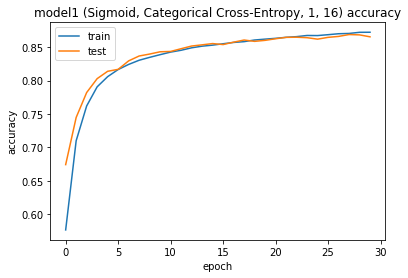

In [15]:
plt.plot(callhistm1.history['accuracy'])
plt.plot(callhistm1.history['val_accuracy'])
plt.legend(['train','test'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('model1 (Sigmoid, Categorical Cross-Entropy, 1, 16) accuracy')
plt.show()

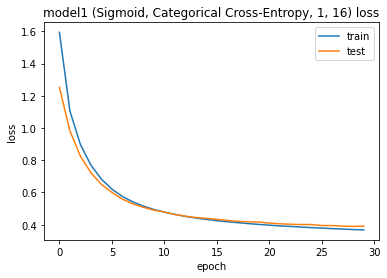

In [16]:
plt.plot(callhistm1.history['loss'])
plt.plot(callhistm1.history['val_loss'])
plt.legend(['train','test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model1 (Sigmoid, Categorical Cross-Entropy, 1, 16) loss')
plt.show()

# Model 2:

1.   Activation Function: Tanh
2.   Loss Function: Categorical Cross-Entropy
3.    Number of Hidden Layers: 1
4.   Number of Nodes in Hidden Layer: 16

Activation Function for output layer: Softmax
<br>
Number of Epochs: 15

In [17]:
start = time.time()

In [18]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape=(28,28,)))
model2.add(tf.keras.layers.Dense(16, activation='tanh'))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))
model2.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [19]:
callhistm2 = model2.fit(x_train,y_train, epochs = 15, validation_data=(x_test,y_test), batch_size = 512)

Epoch 1/15
118/118 [==============================] - 1s 6ms/step - loss: 1.1753 - accuracy: 0.6642 - val_loss: 0.8109 - val_accuracy: 0.7769
Epoch 2/15
118/118 [==============================] - 1s 5ms/step - loss: 0.6924 - accuracy: 0.7983 - val_loss: 0.6143 - val_accuracy: 0.8169
Epoch 3/15
118/118 [==============================] - 1s 5ms/step - loss: 0.5671 - accuracy: 0.8203 - val_loss: 0.5339 - val_accuracy: 0.8341
Epoch 4/15
118/118 [==============================] - 1s 5ms/step - loss: 0.5086 - accuracy: 0.8311 - val_loss: 0.4946 - val_accuracy: 0.8380
Epoch 5/15
118/118 [==============================] - 1s 6ms/step - loss: 0.4726 - accuracy: 0.8404 - val_loss: 0.4652 - val_accuracy: 0.8448
Epoch 6/15
118/118 [==============================] - 1s 6ms/step - loss: 0.4493 - accuracy: 0.8458 - val_loss: 0.4517 - val_accuracy: 0.8462
Epoch 7/15
118/118 [==============================] - 1s 5ms/step - loss: 0.4332 - accuracy: 0.8504 - val_loss: 0.4344 - val_accuracy: 0.8507
Epoch 

In [20]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [21]:
m2_testloss, m2_testacc= model2.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3890 - accuracy: 0.8634


In [22]:
end = time.time()
lst_time.append(end-start)
lst_acc.append(m2_testacc)
lst_loss.append(m2_testloss)
lst_param.append(12730)

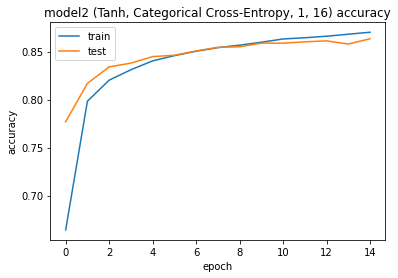

In [23]:
plt.plot(callhistm2.history['accuracy'])
plt.plot(callhistm2.history['val_accuracy'])
plt.legend(['train','test'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('model2 (Tanh, Categorical Cross-Entropy, 1, 16) accuracy')
plt.show()

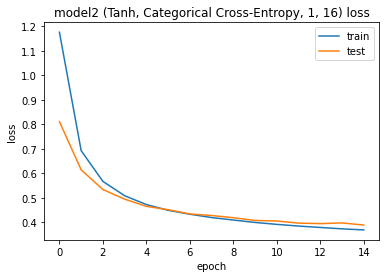

In [24]:
plt.plot(callhistm2.history['loss'])
plt.plot(callhistm2.history['val_loss'])
plt.legend(['train','test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model2 (Tanh, Categorical Cross-Entropy, 1, 16) loss')
plt.show()

# Model 3:

1.   Activation Function: ReLU
2.   Loss Function: Categorical Cross-Entropy
3.    Number of Hidden Layers: 1
4.   Number of Nodes in Hidden Layer: 16

Activation Function for output layer: Softmax
<br>
Number of Epochs: 20

In [25]:
start = time.time()

In [26]:
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Flatten(input_shape=(28,28,)))
model3.add(tf.keras.layers.Dense(16, activation='relu'))
model3.add(tf.keras.layers.Dense(10, activation='softmax'))
model3.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [27]:
callhistm3 = model3.fit(x_train,y_train, epochs = 20, validation_data=(x_test,y_test), batch_size = 512)

Epoch 1/20
118/118 [==============================] - 1s 7ms/step - loss: 1.1714 - accuracy: 0.6023 - val_loss: 0.7487 - val_accuracy: 0.7468
Epoch 2/20
118/118 [==============================] - 1s 6ms/step - loss: 0.6476 - accuracy: 0.7878 - val_loss: 0.5864 - val_accuracy: 0.8111
Epoch 3/20
118/118 [==============================] - 1s 5ms/step - loss: 0.5461 - accuracy: 0.8194 - val_loss: 0.5163 - val_accuracy: 0.8290
Epoch 4/20
118/118 [==============================] - 1s 6ms/step - loss: 0.4979 - accuracy: 0.8329 - val_loss: 0.4824 - val_accuracy: 0.8381
Epoch 5/20
118/118 [==============================] - 1s 5ms/step - loss: 0.4734 - accuracy: 0.8387 - val_loss: 0.4638 - val_accuracy: 0.8458
Epoch 6/20
118/118 [==============================] - 1s 6ms/step - loss: 0.4538 - accuracy: 0.8451 - val_loss: 0.4490 - val_accuracy: 0.8492
Epoch 7/20
118/118 [==============================] - 1s 5ms/step - loss: 0.4405 - accuracy: 0.8493 - val_loss: 0.4443 - val_accuracy: 0.8514
Epoch 

In [28]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [29]:
m3_testloss, m3_testacc= model3.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3870 - accuracy: 0.8664


In [30]:
end = time.time()
lst_time.append(end-start)
lst_acc.append(m3_testacc)
lst_loss.append(m3_testloss)
lst_param.append(12730)

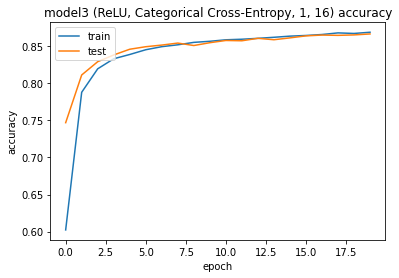

In [31]:
plt.plot(callhistm3.history['accuracy'])
plt.plot(callhistm3.history['val_accuracy'])
plt.legend(['train','test'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('model3 (ReLU, Categorical Cross-Entropy, 1, 16) accuracy')
plt.show()

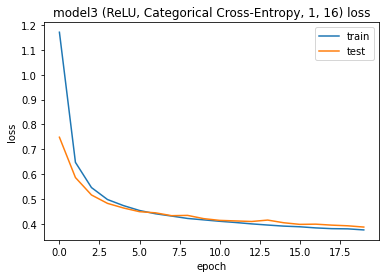

In [32]:
plt.plot(callhistm3.history['loss'])
plt.plot(callhistm3.history['val_loss'])
plt.legend(['train','test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model3 (ReLU, Categorical Cross-Entropy, 1, 16) loss')
plt.show()

# Model 4:

1.   Activation Function: Sigmoid
2.   Loss Function: KL Divergence
3.    Number of Hidden Layers: 1
4.   Number of Nodes in Hidden Layer: 16

Activation Function for output layer: Softmax
<br>
Number of Epochs: 40

In [33]:
start = time.time()

In [34]:
model4 = tf.keras.Sequential()
model4.add(tf.keras.layers.Flatten(input_shape=(28,28,)))
model4.add(tf.keras.layers.Dense(16, activation='sigmoid'))
model4.add(tf.keras.layers.Dense(10, activation='softmax'))
model4.compile(optimizer='adam', loss = 'kld', metrics=['accuracy'])

In [35]:
callhistm4 = model4.fit(x_train,y_train, epochs = 40, validation_data=(x_test,y_test), batch_size = 512)

Epoch 1/40
118/118 [==============================] - 1s 7ms/step - loss: 1.7677 - accuracy: 0.5539 - val_loss: 1.3957 - val_accuracy: 0.6712
Epoch 2/40
118/118 [==============================] - 1s 6ms/step - loss: 1.2076 - accuracy: 0.7012 - val_loss: 1.0538 - val_accuracy: 0.7375
Epoch 3/40
118/118 [==============================] - 1s 6ms/step - loss: 0.9516 - accuracy: 0.7549 - val_loss: 0.8654 - val_accuracy: 0.7789
Epoch 4/40
118/118 [==============================] - 1s 6ms/step - loss: 0.8023 - accuracy: 0.7874 - val_loss: 0.7489 - val_accuracy: 0.8001
Epoch 5/40
118/118 [==============================] - 1s 6ms/step - loss: 0.7055 - accuracy: 0.8043 - val_loss: 0.6692 - val_accuracy: 0.8109
Epoch 6/40
118/118 [==============================] - 1s 6ms/step - loss: 0.6377 - accuracy: 0.8158 - val_loss: 0.6124 - val_accuracy: 0.8214
Epoch 7/40
118/118 [==============================] - 1s 5ms/step - loss: 0.5886 - accuracy: 0.8240 - val_loss: 0.5716 - val_accuracy: 0.8278
Epoch 

In [36]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [37]:
m4_testloss, m4_testacc= model4.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3829 - accuracy: 0.8634


In [38]:
end = time.time()
lst_time.append(end-start)
lst_acc.append(m4_testacc)
lst_loss.append(m4_testloss)
lst_param.append(12730)

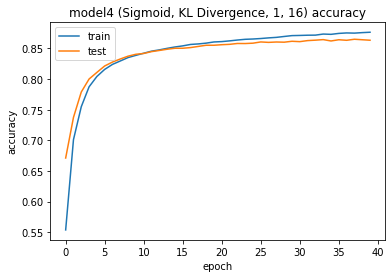

In [39]:
plt.plot(callhistm4.history['accuracy'])
plt.plot(callhistm4.history['val_accuracy'])
plt.legend(['train','test'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('model4 (Sigmoid, KL Divergence, 1, 16) accuracy')
plt.show()

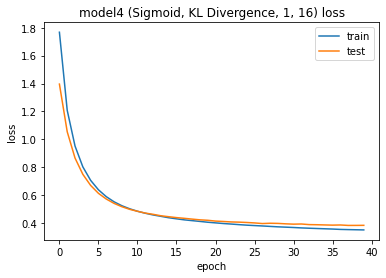

In [40]:
plt.plot(callhistm4.history['loss'])
plt.plot(callhistm4.history['val_loss'])
plt.legend(['train','test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model4 (Sigmoid, KL Divergence, 1, 16) loss')
plt.show()

# Model 5:

1.   Activation Function: Tanh
2.   Loss Function: KL Divergence
3.    Number of Hidden Layers: 1
4.   Number of Nodes in Hidden Layer: 16

Activation Function for output layer: Softmax
<br>
Number of Epochs: 20

In [41]:
start = time.time()

In [42]:
model5 = tf.keras.Sequential()
model5.add(tf.keras.layers.Flatten(input_shape=(28,28,)))
model5.add(tf.keras.layers.Dense(16, activation='tanh'))
model5.add(tf.keras.layers.Dense(10, activation='softmax'))
model5.compile(optimizer='adam', loss = 'kld', metrics=['accuracy'])

In [43]:
callhistm5 = model5.fit(x_train,y_train, epochs = 20, validation_data=(x_test,y_test), batch_size = 512)

Epoch 1/20
118/118 [==============================] - 1s 7ms/step - loss: 1.1326 - accuracy: 0.6733 - val_loss: 0.7929 - val_accuracy: 0.7573
Epoch 2/20
118/118 [==============================] - 1s 6ms/step - loss: 0.6855 - accuracy: 0.7927 - val_loss: 0.6118 - val_accuracy: 0.8115
Epoch 3/20
118/118 [==============================] - 1s 5ms/step - loss: 0.5685 - accuracy: 0.8189 - val_loss: 0.5353 - val_accuracy: 0.8273
Epoch 4/20
118/118 [==============================] - 1s 6ms/step - loss: 0.5102 - accuracy: 0.8330 - val_loss: 0.4925 - val_accuracy: 0.8381
Epoch 5/20
118/118 [==============================] - 1s 5ms/step - loss: 0.4749 - accuracy: 0.8409 - val_loss: 0.4727 - val_accuracy: 0.8379
Epoch 6/20
118/118 [==============================] - 1s 5ms/step - loss: 0.4503 - accuracy: 0.8475 - val_loss: 0.4462 - val_accuracy: 0.8508
Epoch 7/20
118/118 [==============================] - 1s 6ms/step - loss: 0.4328 - accuracy: 0.8520 - val_loss: 0.4398 - val_accuracy: 0.8507
Epoch 

In [44]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [45]:
m5_testloss, m5_testacc= model5.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3767 - accuracy: 0.8661


In [46]:
end = time.time()
lst_time.append(end-start)
lst_acc.append(m5_testacc)
lst_loss.append(m5_testloss)
lst_param.append(12730)

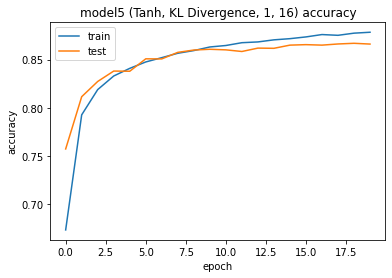

In [47]:
plt.plot(callhistm5.history['accuracy'])
plt.plot(callhistm5.history['val_accuracy'])
plt.legend(['train','test'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('model5 (Tanh, KL Divergence, 1, 16) accuracy')
plt.show()

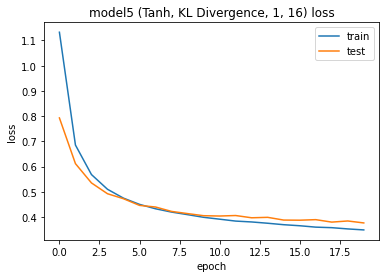

In [48]:
plt.plot(callhistm5.history['loss'])
plt.plot(callhistm5.history['val_loss'])
plt.legend(['train','test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model5 (Tanh, KL Divergence, 1, 16) loss')
plt.show()

# Model 6:

1.   Activation Function: ReLU
2.   Loss Function: KL Divergence
3.    Number of Hidden Layers: 1
4.   Number of Nodes in Hidden Layer: 16

Activation Function for output layer: Softmax
<br>
Number of Epochs: 20

In [49]:
start = time.time()

In [50]:
model6 = tf.keras.Sequential()
model6.add(tf.keras.layers.Flatten(input_shape=(28,28,)))
model6.add(tf.keras.layers.Dense(16, activation='relu'))
model6.add(tf.keras.layers.Dense(10, activation='softmax'))
model6.compile(optimizer='adam', loss = 'kld', metrics=['accuracy'])

In [51]:
callhistm6 = model6.fit(x_train,y_train, epochs = 20, validation_data=(x_test,y_test), batch_size = 512)

Epoch 1/20
118/118 [==============================] - 1s 7ms/step - loss: 1.2203 - accuracy: 0.6047 - val_loss: 0.7771 - val_accuracy: 0.7363
Epoch 2/20
118/118 [==============================] - 1s 6ms/step - loss: 0.6686 - accuracy: 0.7771 - val_loss: 0.5949 - val_accuracy: 0.8016
Epoch 3/20
118/118 [==============================] - 1s 6ms/step - loss: 0.5580 - accuracy: 0.8135 - val_loss: 0.5289 - val_accuracy: 0.8195
Epoch 4/20
118/118 [==============================] - 1s 6ms/step - loss: 0.5092 - accuracy: 0.8276 - val_loss: 0.4971 - val_accuracy: 0.8291
Epoch 5/20
118/118 [==============================] - 1s 6ms/step - loss: 0.4830 - accuracy: 0.8342 - val_loss: 0.4747 - val_accuracy: 0.8374
Epoch 6/20
118/118 [==============================] - 1s 6ms/step - loss: 0.4634 - accuracy: 0.8410 - val_loss: 0.4577 - val_accuracy: 0.8433
Epoch 7/20
118/118 [==============================] - 1s 6ms/step - loss: 0.4513 - accuracy: 0.8436 - val_loss: 0.4520 - val_accuracy: 0.8450
Epoch 

In [52]:
model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [53]:
m6_testloss, m6_testacc= model6.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.4051 - accuracy: 0.8619


In [54]:
end = time.time()
lst_time.append(end-start)
lst_acc.append(m6_testacc)
lst_loss.append(m6_testloss)
lst_param.append(12730)

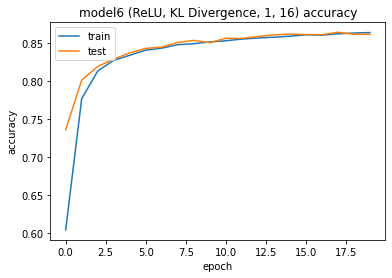

In [55]:
plt.plot(callhistm6.history['accuracy'])
plt.plot(callhistm6.history['val_accuracy'])
plt.legend(['train','test'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('model6 (ReLU, KL Divergence, 1, 16) accuracy')
plt.show()

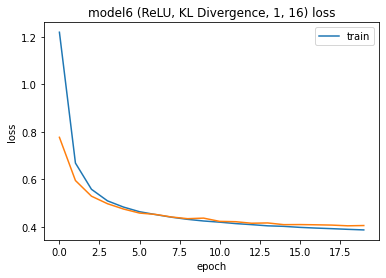

In [56]:
plt.plot(callhistm6.history['loss'])
plt.plot(callhistm6.history['val_loss'])
plt.legend(['train'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model6 (ReLU, KL Divergence, 1, 16) loss')
plt.show()

# Model 7:

1.   Activation Function: Sigmoid
2.   Loss Function: Categorical Cross-Entropy
3.    Number of Hidden Layers: 3
4.   Number of Nodes in Hidden Layer: 64,32,16

Activation Function for output layer: Softmax
<br>
Number of Epochs: 20

In [57]:
start = time.time()

In [58]:
model7 = tf.keras.Sequential()
model7.add(tf.keras.layers.Flatten(input_shape=(28,28,)))
model7.add(tf.keras.layers.Dense(64, activation='sigmoid'))
model7.add(tf.keras.layers.Dense(32, activation='sigmoid'))
model7.add(tf.keras.layers.Dense(16, activation='sigmoid'))
model7.add(tf.keras.layers.Dense(10, activation='softmax'))
model7.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [59]:
callhistm7 = model7.fit(x_train,y_train, epochs = 20, validation_data=(x_test,y_test), batch_size = 512)

Epoch 1/20
118/118 [==============================] - 1s 9ms/step - loss: 2.1295 - accuracy: 0.2833 - val_loss: 1.8375 - val_accuracy: 0.4770
Epoch 2/20
118/118 [==============================] - 1s 8ms/step - loss: 1.5694 - accuracy: 0.6041 - val_loss: 1.3423 - val_accuracy: 0.6615
Epoch 3/20
118/118 [==============================] - 1s 7ms/step - loss: 1.1828 - accuracy: 0.6902 - val_loss: 1.0536 - val_accuracy: 0.7183
Epoch 4/20
118/118 [==============================] - 1s 7ms/step - loss: 0.9455 - accuracy: 0.7424 - val_loss: 0.8589 - val_accuracy: 0.7591
Epoch 5/20
118/118 [==============================] - 1s 7ms/step - loss: 0.7832 - accuracy: 0.7861 - val_loss: 0.7254 - val_accuracy: 0.8079
Epoch 6/20
118/118 [==============================] - 1s 7ms/step - loss: 0.6694 - accuracy: 0.8203 - val_loss: 0.6290 - val_accuracy: 0.8340
Epoch 7/20
118/118 [==============================] - 1s 8ms/step - loss: 0.5890 - accuracy: 0.8377 - val_loss: 0.5701 - val_accuracy: 0.8382
Epoch 

In [60]:
model7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [61]:
m7_testloss, m7_testacc= model7.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3628 - accuracy: 0.8740


In [62]:
end = time.time()
lst_time.append(end-start)
lst_acc.append(m7_testacc)
lst_loss.append(m7_testloss)
lst_param.append(53018)

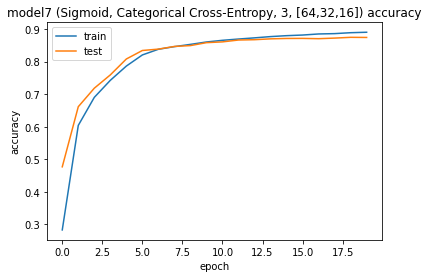

In [63]:
plt.plot(callhistm7.history['accuracy'])
plt.plot(callhistm7.history['val_accuracy'])
plt.legend(['train','test'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('model7 (Sigmoid, Categorical Cross-Entropy, 3, [64,32,16]) accuracy')
plt.show()

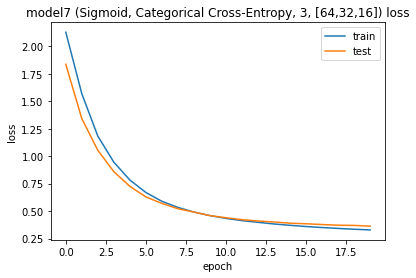

In [64]:
plt.plot(callhistm7.history['loss'])
plt.plot(callhistm7.history['val_loss'])
plt.legend(['train','test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model7 (Sigmoid, Categorical Cross-Entropy, 3, [64,32,16]) loss')
plt.show()

# Model 8:

1.   Activation Function: Tanh
2.   Loss Function: Categorical Cross-Entropy
3.    Number of Hidden Layers: 3
4.   Number of Nodes in Hidden Layer: 64,32,16

Activation Function for output layer: Softmax
<br>
Number of Epochs: 15

In [65]:
start = time.time()

In [66]:
model8 = tf.keras.Sequential()
model8.add(tf.keras.layers.Flatten(input_shape=(28,28,)))
model8.add(tf.keras.layers.Dense(64, activation='tanh'))
model8.add(tf.keras.layers.Dense(32, activation='tanh'))
model8.add(tf.keras.layers.Dense(16, activation='tanh'))
model8.add(tf.keras.layers.Dense(10, activation='softmax'))
model8.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [67]:
callhistm8 = model8.fit(x_train,y_train, epochs = 15, validation_data=(x_test,y_test), batch_size = 512)

Epoch 1/15
118/118 [==============================] - 2s 10ms/step - loss: 0.9499 - accuracy: 0.7251 - val_loss: 0.6121 - val_accuracy: 0.8248
Epoch 2/15
118/118 [==============================] - 1s 7ms/step - loss: 0.5339 - accuracy: 0.8332 - val_loss: 0.4852 - val_accuracy: 0.8431
Epoch 3/15
118/118 [==============================] - 1s 7ms/step - loss: 0.4449 - accuracy: 0.8529 - val_loss: 0.4228 - val_accuracy: 0.8614
Epoch 4/15
118/118 [==============================] - 1s 7ms/step - loss: 0.4024 - accuracy: 0.8620 - val_loss: 0.3889 - val_accuracy: 0.8681
Epoch 5/15
118/118 [==============================] - 1s 7ms/step - loss: 0.3744 - accuracy: 0.8704 - val_loss: 0.3821 - val_accuracy: 0.8672
Epoch 6/15
118/118 [==============================] - 1s 7ms/step - loss: 0.3559 - accuracy: 0.8770 - val_loss: 0.3667 - val_accuracy: 0.8743
Epoch 7/15
118/118 [==============================] - 1s 8ms/step - loss: 0.3414 - accuracy: 0.8802 - val_loss: 0.3541 - val_accuracy: 0.8764
Epoch

In [68]:
model8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_19 (Dense)             (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [69]:
m8_testloss, m8_testacc= model8.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3391 - accuracy: 0.8821


In [70]:
end = time.time()
lst_time.append(end-start)
lst_acc.append(m8_testacc)
lst_loss.append(m8_testloss)
lst_param.append(53018)

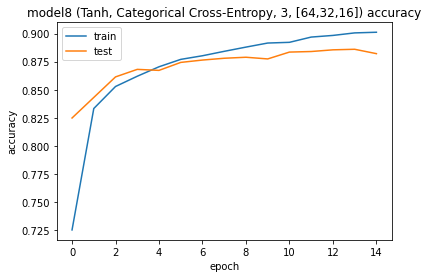

In [71]:
plt.plot(callhistm8.history['accuracy'])
plt.plot(callhistm8.history['val_accuracy'])
plt.legend(['train','test'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('model8 (Tanh, Categorical Cross-Entropy, 3, [64,32,16]) accuracy')
plt.show()

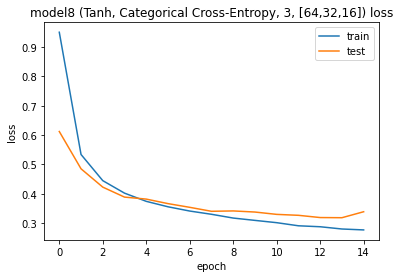

In [72]:
plt.plot(callhistm8.history['loss'])
plt.plot(callhistm8.history['val_loss'])
plt.legend(['train','test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model8 (Tanh, Categorical Cross-Entropy, 3, [64,32,16]) loss')
plt.show()

# Model 9:

1.   Activation Function: ReLU
2.   Loss Function: Categorical Cross-Entropy
3.    Number of Hidden Layers: 3
4.   Number of Nodes in Hidden Layer: 64,32,16

Activation Function for output layer: Softmax
<br>
Number of Epochs: 20

In [73]:
start = time.time()

In [74]:
model9 = tf.keras.Sequential()
model9.add(tf.keras.layers.Flatten(input_shape=(28,28,)))
model9.add(tf.keras.layers.Dense(64, activation='relu'))
model9.add(tf.keras.layers.Dense(32, activation='relu'))
model9.add(tf.keras.layers.Dense(16, activation='relu'))
model9.add(tf.keras.layers.Dense(10, activation='softmax'))
model9.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [75]:
callhistm9 = model9.fit(x_train,y_train, epochs = 20, validation_data=(x_test,y_test), batch_size = 512)

Epoch 1/20
118/118 [==============================] - 2s 9ms/step - loss: 0.9754 - accuracy: 0.6814 - val_loss: 0.5518 - val_accuracy: 0.8155
Epoch 2/20
118/118 [==============================] - 1s 7ms/step - loss: 0.5031 - accuracy: 0.8277 - val_loss: 0.4838 - val_accuracy: 0.8326
Epoch 3/20
118/118 [==============================] - 1s 7ms/step - loss: 0.4447 - accuracy: 0.8458 - val_loss: 0.4376 - val_accuracy: 0.8455
Epoch 4/20
118/118 [==============================] - 1s 7ms/step - loss: 0.4162 - accuracy: 0.8548 - val_loss: 0.4120 - val_accuracy: 0.8556
Epoch 5/20
118/118 [==============================] - 1s 7ms/step - loss: 0.3933 - accuracy: 0.8626 - val_loss: 0.3926 - val_accuracy: 0.8629
Epoch 6/20
118/118 [==============================] - 1s 7ms/step - loss: 0.3784 - accuracy: 0.8664 - val_loss: 0.3820 - val_accuracy: 0.8655
Epoch 7/20
118/118 [==============================] - 1s 8ms/step - loss: 0.3666 - accuracy: 0.8704 - val_loss: 0.3746 - val_accuracy: 0.8659
Epoch 

In [76]:
model9.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_21 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_22 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [77]:
m9_testloss, m9_testacc= model9.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3279 - accuracy: 0.8818


In [78]:
end = time.time()
lst_time.append(end-start)
lst_acc.append(m9_testacc)
lst_loss.append(m9_testloss)
lst_param.append(53018)

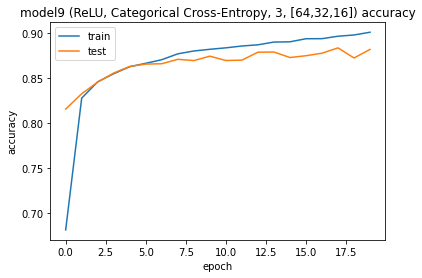

In [79]:
plt.plot(callhistm9.history['accuracy'])
plt.plot(callhistm9.history['val_accuracy'])
plt.legend(['train','test'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('model9 (ReLU, Categorical Cross-Entropy, 3, [64,32,16]) accuracy')
plt.show()

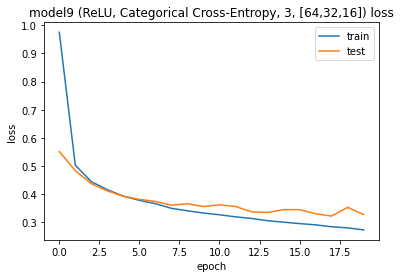

In [80]:
plt.plot(callhistm9.history['loss'])
plt.plot(callhistm9.history['val_loss'])
plt.legend(['train','test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model9 (ReLU, Categorical Cross-Entropy, 3, [64,32,16]) loss')
plt.show()

# Model 10:

1.   Activation Function: Sigmoid
2.   Loss Function: KL Divergence
3.    Number of Hidden Layers: 3
4.   Number of Nodes in Hidden Layer: 64,32,16

Activation Function for output layer: Softmax
<br>
Number of Epochs: 50

In [81]:
start = time.time()

In [82]:
model10 = tf.keras.Sequential()
model10.add(tf.keras.layers.Flatten(input_shape=(28,28,)))
model10.add(tf.keras.layers.Dense(64, activation='sigmoid'))
model10.add(tf.keras.layers.Dense(32, activation='sigmoid'))
model10.add(tf.keras.layers.Dense(16, activation='sigmoid'))
model10.add(tf.keras.layers.Dense(10, activation='softmax'))
model10.compile(optimizer='adam', loss = 'kld', metrics=['accuracy'])

In [83]:
callhistm10 = model10.fit(x_train,y_train, epochs = 50, validation_data=(x_test,y_test), batch_size = 512)

Epoch 1/50
118/118 [==============================] - 1s 9ms/step - loss: 2.0673 - accuracy: 0.2913 - val_loss: 1.7665 - val_accuracy: 0.3763
Epoch 2/50
118/118 [==============================] - 1s 7ms/step - loss: 1.5498 - accuracy: 0.5194 - val_loss: 1.3679 - val_accuracy: 0.6007
Epoch 3/50
118/118 [==============================] - 1s 7ms/step - loss: 1.2281 - accuracy: 0.6639 - val_loss: 1.1034 - val_accuracy: 0.6871
Epoch 4/50
118/118 [==============================] - 1s 7ms/step - loss: 1.0045 - accuracy: 0.7034 - val_loss: 0.9248 - val_accuracy: 0.7233
Epoch 5/50
118/118 [==============================] - 1s 7ms/step - loss: 0.8594 - accuracy: 0.7356 - val_loss: 0.8086 - val_accuracy: 0.7503
Epoch 6/50
118/118 [==============================] - 1s 7ms/step - loss: 0.7565 - accuracy: 0.7676 - val_loss: 0.7193 - val_accuracy: 0.7809
Epoch 7/50
118/118 [==============================] - 1s 7ms/step - loss: 0.6733 - accuracy: 0.7918 - val_loss: 0.6502 - val_accuracy: 0.7965
Epoch 

In [84]:
model10.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_26 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [85]:
m10_testloss, m10_testacc= model10.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3262 - accuracy: 0.8873


In [86]:
end = time.time()
lst_time.append(end-start)
lst_acc.append(m10_testacc)
lst_loss.append(m10_testloss)
lst_param.append(53018)

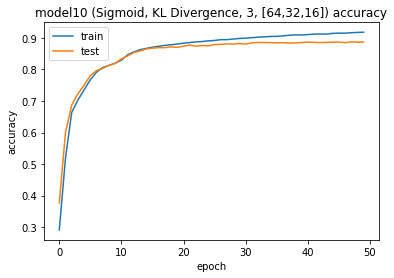

In [87]:
plt.plot(callhistm10.history['accuracy'])
plt.plot(callhistm10.history['val_accuracy'])
plt.legend(['train','test'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('model10 (Sigmoid, KL Divergence, 3, [64,32,16]) accuracy')
plt.show()

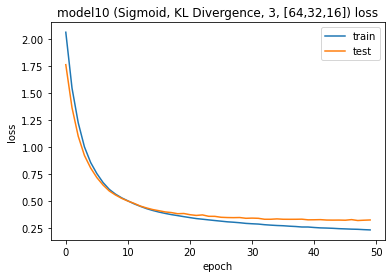

In [88]:
plt.plot(callhistm10.history['loss'])
plt.plot(callhistm10.history['val_loss'])
plt.legend(['train','test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model10 (Sigmoid, KL Divergence, 3, [64,32,16]) loss')
plt.show()

# Model 11:

1.   Activation Function: Tanh
2.   Loss Function: KL Divergence
3.    Number of Hidden Layers: 3
4.   Number of Nodes in Hidden Layer: 64,32,16

Activation Function for output layer: Softmax
<br>
Number of Epochs: 20

In [89]:
start = time.time()

In [90]:
model11 = tf.keras.Sequential()
model11.add(tf.keras.layers.Flatten(input_shape=(28,28,)))
model11.add(tf.keras.layers.Dense(64, activation='tanh'))
model11.add(tf.keras.layers.Dense(32, activation='tanh'))
model11.add(tf.keras.layers.Dense(16, activation='tanh'))
model11.add(tf.keras.layers.Dense(10, activation='softmax'))
model11.compile(optimizer='adam', loss = 'kld', metrics=['accuracy'])

In [91]:
callhistm11 = model11.fit(x_train,y_train, epochs = 20, validation_data=(x_test,y_test), batch_size = 512)

Epoch 1/20
118/118 [==============================] - 2s 9ms/step - loss: 0.9472 - accuracy: 0.7266 - val_loss: 0.6183 - val_accuracy: 0.8141
Epoch 2/20
118/118 [==============================] - 1s 8ms/step - loss: 0.5388 - accuracy: 0.8306 - val_loss: 0.4866 - val_accuracy: 0.8452
Epoch 3/20
118/118 [==============================] - 1s 7ms/step - loss: 0.4513 - accuracy: 0.8507 - val_loss: 0.4247 - val_accuracy: 0.8608
Epoch 4/20
118/118 [==============================] - 1s 8ms/step - loss: 0.4097 - accuracy: 0.8618 - val_loss: 0.3939 - val_accuracy: 0.8685
Epoch 5/20
118/118 [==============================] - 1s 8ms/step - loss: 0.3789 - accuracy: 0.8709 - val_loss: 0.3893 - val_accuracy: 0.8641
Epoch 6/20
118/118 [==============================] - 1s 7ms/step - loss: 0.3619 - accuracy: 0.8755 - val_loss: 0.3727 - val_accuracy: 0.8730
Epoch 7/20
118/118 [==============================] - 1s 7ms/step - loss: 0.3482 - accuracy: 0.8793 - val_loss: 0.3580 - val_accuracy: 0.8760
Epoch 

In [92]:
model11.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_29 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_30 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_31 (Dense)             (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [93]:
m11_testloss, m11_testacc= model11.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3143 - accuracy: 0.8870


In [94]:
end = time.time()
lst_time.append(end-start)
lst_acc.append(m11_testacc)
lst_loss.append(m11_testloss)
lst_param.append(53018)

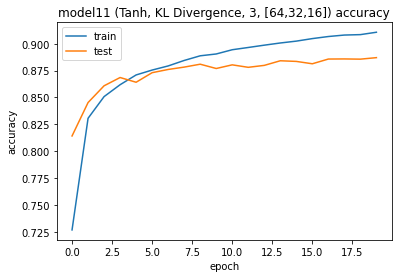

In [95]:
plt.plot(callhistm11.history['accuracy'])
plt.plot(callhistm11.history['val_accuracy'])
plt.legend(['train','test'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('model11 (Tanh, KL Divergence, 3, [64,32,16]) accuracy')
plt.show()

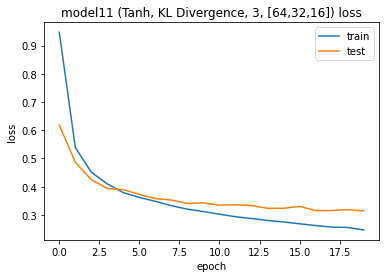

In [96]:
plt.plot(callhistm11.history['loss'])
plt.plot(callhistm11.history['val_loss'])
plt.legend(['train','test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model11 (Tanh, KL Divergence, 3, [64,32,16]) loss')
plt.show()

# Model 12:

1.   Activation Function: ReLU
2.   Loss Function: KL Divergence
3.    Number of Hidden Layers: 3
4.   Number of Nodes in Hidden Layer: 64,32,16

Activation Function for output layer: Softmax
<br>
Number of Epochs: 30

In [97]:
start = time.time()

In [98]:
model12 = tf.keras.Sequential()
model12.add(tf.keras.layers.Flatten(input_shape=(28,28,)))
model12.add(tf.keras.layers.Dense(64, activation='relu'))
model12.add(tf.keras.layers.Dense(32, activation='relu'))
model12.add(tf.keras.layers.Dense(16, activation='relu'))
model12.add(tf.keras.layers.Dense(10, activation='softmax'))
model12.compile(optimizer='adam', loss = 'kld', metrics=['accuracy'])

In [99]:
callhistm12 = model12.fit(x_train,y_train, epochs = 30, validation_data=(x_test,y_test), batch_size = 512)

Epoch 1/30
118/118 [==============================] - 2s 10ms/step - loss: 1.0160 - accuracy: 0.6570 - val_loss: 0.5752 - val_accuracy: 0.8105
Epoch 2/30
118/118 [==============================] - 1s 8ms/step - loss: 0.5083 - accuracy: 0.8273 - val_loss: 0.4661 - val_accuracy: 0.8423
Epoch 3/30
118/118 [==============================] - 1s 7ms/step - loss: 0.4454 - accuracy: 0.8455 - val_loss: 0.4358 - val_accuracy: 0.8487
Epoch 4/30
118/118 [==============================] - 1s 7ms/step - loss: 0.4180 - accuracy: 0.8546 - val_loss: 0.4476 - val_accuracy: 0.8471
Epoch 5/30
118/118 [==============================] - 1s 7ms/step - loss: 0.3974 - accuracy: 0.8616 - val_loss: 0.4021 - val_accuracy: 0.8632
Epoch 6/30
118/118 [==============================] - 1s 7ms/step - loss: 0.3815 - accuracy: 0.8663 - val_loss: 0.3835 - val_accuracy: 0.8654
Epoch 7/30
118/118 [==============================] - 1s 8ms/step - loss: 0.3676 - accuracy: 0.8719 - val_loss: 0.3793 - val_accuracy: 0.8689
Epoch

In [100]:
model12.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_34 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_35 (Dense)             (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [101]:
m12_testloss, m12_testacc= model12.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3219 - accuracy: 0.8853


In [102]:
end = time.time()
lst_time.append(end-start)
lst_acc.append(m12_testacc)
lst_loss.append(m12_testloss)
lst_param.append(53018)

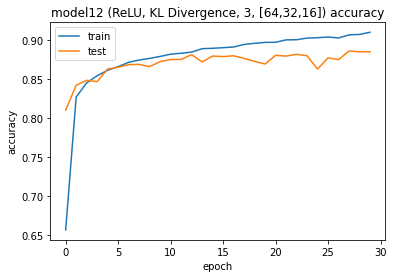

In [103]:
plt.plot(callhistm12.history['accuracy'])
plt.plot(callhistm12.history['val_accuracy'])
plt.legend(['train','test'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('model12 (ReLU, KL Divergence, 3, [64,32,16]) accuracy')
plt.show()

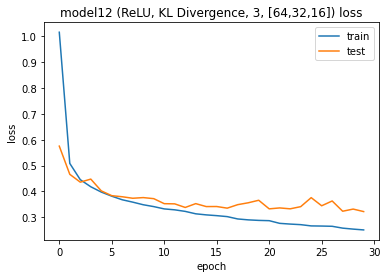

In [104]:
plt.plot(callhistm12.history['loss'])
plt.plot(callhistm12.history['val_loss'])
plt.legend(['train','test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model12 (ReLU, KL Divergence, 3, [64,32,16]) loss')
plt.show()

# Model 13:

1.   Activation Function: Sigmoid
2.   Loss Function: KL Divergence
3.    Number of Hidden Layers: 5
4.   Number of Nodes in Hidden Layer: 256,128,64,32,16

Activation Function for output layer: Softmax
<br>
Number of Epochs: 30

In [105]:
start = time.time()

In [106]:
model13 = tf.keras.Sequential()
model13.add(tf.keras.layers.Flatten(input_shape=(28,28,)))
model13.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model13.add(tf.keras.layers.Dense(128, activation='sigmoid'))
model13.add(tf.keras.layers.Dense(64, activation='sigmoid'))
model13.add(tf.keras.layers.Dense(32, activation='sigmoid'))
model13.add(tf.keras.layers.Dense(16, activation='sigmoid'))
model13.add(tf.keras.layers.Dense(10, activation='softmax'))
model13.compile(optimizer='adam', loss = 'kld', metrics=['accuracy'])

In [107]:
callhistm13 = model13.fit(x_train,y_train, epochs = 30, validation_data=(x_test,y_test), batch_size = 512)

Epoch 1/30
118/118 [==============================] - 3s 20ms/step - loss: 2.2148 - accuracy: 0.1673 - val_loss: 1.9377 - val_accuracy: 0.2014
Epoch 2/30
118/118 [==============================] - 2s 18ms/step - loss: 1.7756 - accuracy: 0.2487 - val_loss: 1.6502 - val_accuracy: 0.2958
Epoch 3/30
118/118 [==============================] - 2s 18ms/step - loss: 1.5837 - accuracy: 0.2978 - val_loss: 1.5374 - val_accuracy: 0.2955
Epoch 4/30
118/118 [==============================] - 2s 18ms/step - loss: 1.5112 - accuracy: 0.2968 - val_loss: 1.4931 - val_accuracy: 0.2981
Epoch 5/30
118/118 [==============================] - 2s 18ms/step - loss: 1.4776 - accuracy: 0.3038 - val_loss: 1.4694 - val_accuracy: 0.2967
Epoch 6/30
118/118 [==============================] - 2s 18ms/step - loss: 1.4375 - accuracy: 0.3867 - val_loss: 1.3933 - val_accuracy: 0.4003
Epoch 7/30
118/118 [==============================] - 2s 18ms/step - loss: 1.3317 - accuracy: 0.4051 - val_loss: 1.2802 - val_accuracy: 0.4728

In [108]:
model13.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_37 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_38 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_39 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_40 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_41 (Dense)             (None, 10)              

In [109]:
m13_testloss, m13_testacc= model13.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3648 - accuracy: 0.8812


In [110]:
end = time.time()
lst_time.append(end-start)
lst_acc.append(m13_testacc)
lst_loss.append(m13_testloss)
lst_param.append(244890)

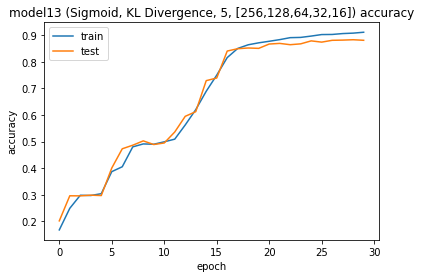

In [111]:
plt.plot(callhistm13.history['accuracy'])
plt.plot(callhistm13.history['val_accuracy'])
plt.legend(['train','test'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('model13 (Sigmoid, KL Divergence, 5, [256,128,64,32,16]) accuracy')
plt.show()

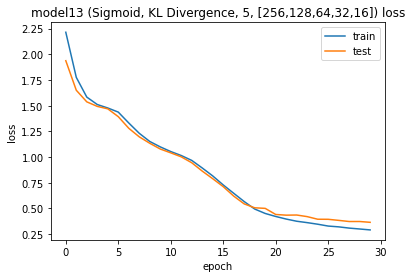

In [112]:
plt.plot(callhistm13.history['loss'])
plt.plot(callhistm13.history['val_loss'])
plt.legend(['train','test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model13 (Sigmoid, KL Divergence, 5, [256,128,64,32,16]) loss')
plt.show()

# Model 14:

1.   Activation Function: Tanh
2.   Loss Function: KL Divergence
3.    Number of Hidden Layers: 5
4.   Number of Nodes in Hidden Layer: 256,128,64,32,16

Activation Function for output layer: Softmax
<br>
Number of Epochs: 10

In [113]:
start = time.time()

In [114]:
model14 = tf.keras.Sequential()
model14.add(tf.keras.layers.Flatten(input_shape=(28,28,)))
model14.add(tf.keras.layers.Dense(256, activation='tanh'))
model14.add(tf.keras.layers.Dense(128, activation='tanh'))
model14.add(tf.keras.layers.Dense(64, activation='tanh'))
model14.add(tf.keras.layers.Dense(32, activation='tanh'))
model14.add(tf.keras.layers.Dense(16, activation='tanh'))
model14.add(tf.keras.layers.Dense(10, activation='softmax'))
model14.compile(optimizer='adam', loss = 'kld', metrics=['accuracy'])

In [115]:
callhistm14 = model14.fit(x_train,y_train, epochs = 10, validation_data=(x_test,y_test), batch_size = 512)

Epoch 1/10
118/118 [==============================] - 3s 20ms/step - loss: 0.8765 - accuracy: 0.7479 - val_loss: 0.5915 - val_accuracy: 0.8327
Epoch 2/10
118/118 [==============================] - 2s 18ms/step - loss: 0.4961 - accuracy: 0.8501 - val_loss: 0.4980 - val_accuracy: 0.8340
Epoch 3/10
118/118 [==============================] - 2s 18ms/step - loss: 0.4212 - accuracy: 0.8636 - val_loss: 0.4074 - val_accuracy: 0.8648
Epoch 4/10
118/118 [==============================] - 2s 18ms/step - loss: 0.3801 - accuracy: 0.8741 - val_loss: 0.3887 - val_accuracy: 0.8646
Epoch 5/10
118/118 [==============================] - 2s 18ms/step - loss: 0.3481 - accuracy: 0.8811 - val_loss: 0.3663 - val_accuracy: 0.8745
Epoch 6/10
118/118 [==============================] - 2s 18ms/step - loss: 0.3325 - accuracy: 0.8867 - val_loss: 0.4251 - val_accuracy: 0.8482
Epoch 7/10
118/118 [==============================] - 2s 18ms/step - loss: 0.3154 - accuracy: 0.8909 - val_loss: 0.3404 - val_accuracy: 0.8806

In [116]:
model14.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_43 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_44 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_45 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_46 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_47 (Dense)             (None, 10)              

In [117]:
m14_testloss, m14_testacc= model14.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3384 - accuracy: 0.8803


In [118]:
end = time.time()
lst_time.append(end-start)
lst_acc.append(m14_testacc)
lst_loss.append(m14_testloss)
lst_param.append(244890)

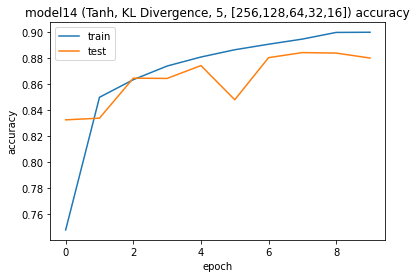

In [119]:
plt.plot(callhistm14.history['accuracy'])
plt.plot(callhistm14.history['val_accuracy'])
plt.legend(['train','test'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('model14 (Tanh, KL Divergence, 5, [256,128,64,32,16]) accuracy')
plt.show()

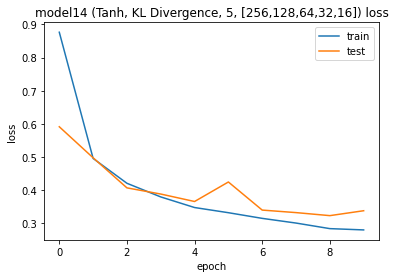

In [120]:
plt.plot(callhistm14.history['loss'])
plt.plot(callhistm14.history['val_loss'])
plt.legend(['train','test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model14 (Tanh, KL Divergence, 5, [256,128,64,32,16]) loss')
plt.show()

# Model 15:

1.   Activation Function: ReLU
2.   Loss Function: Categorical Cross-Entropy
3.    Number of Hidden Layers: 5
4.   Number of Nodes in Hidden Layer: 256,128,64,32,16

Activation Function for output layer: Softmax
<br>
Number of Epochs: 20

In [121]:
start = time.time()

In [122]:
model15 = tf.keras.Sequential()
model15.add(tf.keras.layers.Flatten(input_shape=(28,28,)))
model15.add(tf.keras.layers.Dense(256, activation='relu'))
model15.add(tf.keras.layers.Dense(128, activation='relu'))
model15.add(tf.keras.layers.Dense(64, activation='relu'))
model15.add(tf.keras.layers.Dense(32, activation='relu'))
model15.add(tf.keras.layers.Dense(16, activation='relu'))
model15.add(tf.keras.layers.Dense(10, activation='softmax'))
model15.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [123]:
callhistm15 = model15.fit(x_train,y_train, epochs = 20, validation_data=(x_test,y_test), batch_size = 512)

Epoch 1/20
118/118 [==============================] - 3s 20ms/step - loss: 0.8761 - accuracy: 0.6903 - val_loss: 0.5654 - val_accuracy: 0.7921
Epoch 2/20
118/118 [==============================] - 2s 18ms/step - loss: 0.4608 - accuracy: 0.8377 - val_loss: 0.4157 - val_accuracy: 0.8572
Epoch 3/20
118/118 [==============================] - 2s 18ms/step - loss: 0.4025 - accuracy: 0.8575 - val_loss: 0.3871 - val_accuracy: 0.8635
Epoch 4/20
118/118 [==============================] - 2s 18ms/step - loss: 0.3727 - accuracy: 0.8673 - val_loss: 0.3524 - val_accuracy: 0.8755
Epoch 5/20
118/118 [==============================] - 2s 18ms/step - loss: 0.3418 - accuracy: 0.8778 - val_loss: 0.3357 - val_accuracy: 0.8781
Epoch 6/20
118/118 [==============================] - 2s 18ms/step - loss: 0.3235 - accuracy: 0.8846 - val_loss: 0.3400 - val_accuracy: 0.8778
Epoch 7/20
118/118 [==============================] - 2s 18ms/step - loss: 0.3075 - accuracy: 0.8900 - val_loss: 0.3326 - val_accuracy: 0.8795

In [124]:
model15.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_49 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_50 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_51 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_52 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_53 (Dense)             (None, 10)              

In [125]:
m15_testloss, m15_testacc= model15.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.2977 - accuracy: 0.8945


In [126]:
end = time.time()
lst_time.append(end-start)
lst_acc.append(m15_testacc)
lst_loss.append(m15_testloss)
lst_param.append(244890)

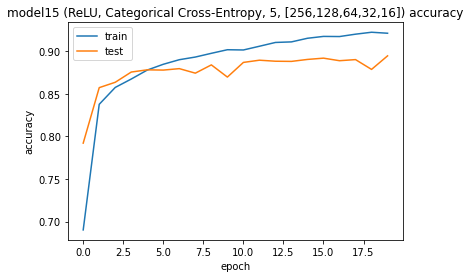

In [127]:
plt.plot(callhistm15.history['accuracy'])
plt.plot(callhistm15.history['val_accuracy'])
plt.legend(['train','test'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('model15 (ReLU, Categorical Cross-Entropy, 5, [256,128,64,32,16]) accuracy')
plt.show()

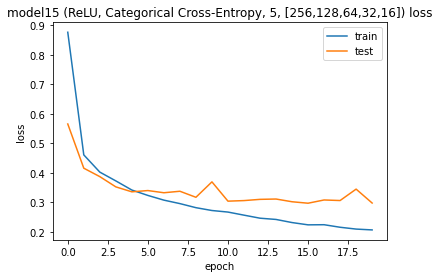

In [128]:
plt.plot(callhistm15.history['loss'])
plt.plot(callhistm15.history['val_loss'])
plt.legend(['train','test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model15 (ReLU, Categorical Cross-Entropy, 5, [256,128,64,32,16]) loss')
plt.show()

# Model 16:

1.   Activation Function: Sigmoid
2.   Loss Function: Categorical Cross-Entropy
3.    Number of Hidden Layers: 7
4.   Number of Nodes in Hidden Layer: 1024,512,256,128,64,32,16

Activation Function for output layer: Softmax
<br>
Number of Epochs: 60

In [129]:
start = time.time()

In [130]:
model16 = tf.keras.Sequential()
model16.add(tf.keras.layers.Flatten(input_shape=(28,28,)))
model16.add(tf.keras.layers.Dense(1024, activation='sigmoid'))
model16.add(tf.keras.layers.Dense(512, activation='sigmoid'))
model16.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model16.add(tf.keras.layers.Dense(128, activation='sigmoid'))
model16.add(tf.keras.layers.Dense(64, activation='sigmoid'))
model16.add(tf.keras.layers.Dense(32, activation='sigmoid'))
model16.add(tf.keras.layers.Dense(16, activation='sigmoid'))
model16.add(tf.keras.layers.Dense(10, activation='softmax'))
model16.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [131]:
callhistm16 = model16.fit(x_train,y_train, epochs = 60, validation_data=(x_test,y_test), batch_size = 512)

Epoch 1/60
118/118 [==============================] - 11s 90ms/step - loss: 2.2126 - accuracy: 0.1487 - val_loss: 1.9907 - val_accuracy: 0.1859
Epoch 2/60
118/118 [==============================] - 10s 88ms/step - loss: 1.8837 - accuracy: 0.2169 - val_loss: 1.8035 - val_accuracy: 0.2456
Epoch 3/60
118/118 [==============================] - 10s 88ms/step - loss: 1.6959 - accuracy: 0.2926 - val_loss: 1.6254 - val_accuracy: 0.3318
Epoch 4/60
118/118 [==============================] - 10s 89ms/step - loss: 1.5731 - accuracy: 0.3289 - val_loss: 1.5419 - val_accuracy: 0.3651
Epoch 5/60
118/118 [==============================] - 10s 88ms/step - loss: 1.4817 - accuracy: 0.4216 - val_loss: 1.4404 - val_accuracy: 0.4413
Epoch 6/60
118/118 [==============================] - 10s 88ms/step - loss: 1.3739 - accuracy: 0.4749 - val_loss: 1.3459 - val_accuracy: 0.4934
Epoch 7/60
118/118 [==============================] - 10s 89ms/step - loss: 1.2422 - accuracy: 0.5414 - val_loss: 1.0773 - val_accuracy:

In [132]:
model16.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_55 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_56 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_57 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_58 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_59 (Dense)             (None, 32)              

In [133]:
m16_testloss, m16_testacc= model16.evaluate(x_test,y_test,verbose=1)

313/313 [==============================] - 2s 7ms/step - loss: 0.3703 - accuracy: 0.8927


In [134]:
end = time.time()
lst_time.append(end-start)
lst_acc.append(m16_testacc)
lst_loss.append(m16_testloss)
lst_param.append(1503898)

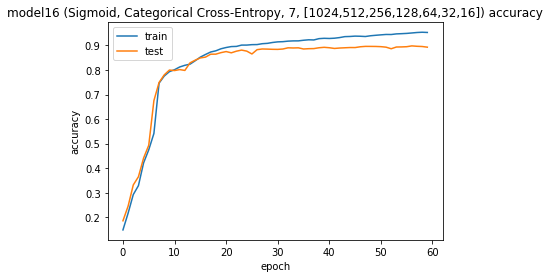

In [135]:
plt.plot(callhistm16.history['accuracy'])
plt.plot(callhistm16.history['val_accuracy'])
plt.legend(['train','test'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('model16 (Sigmoid, Categorical Cross-Entropy, 7, [1024,512,256,128,64,32,16]) accuracy')
plt.show()

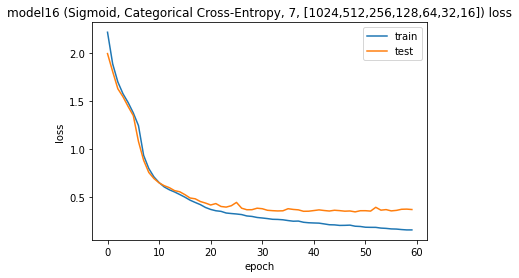

In [136]:
plt.plot(callhistm16.history['loss'])
plt.plot(callhistm16.history['val_loss'])
plt.legend(['train','test'], loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model16 (Sigmoid, Categorical Cross-Entropy, 7, [1024,512,256,128,64,32,16]) loss')
plt.show()

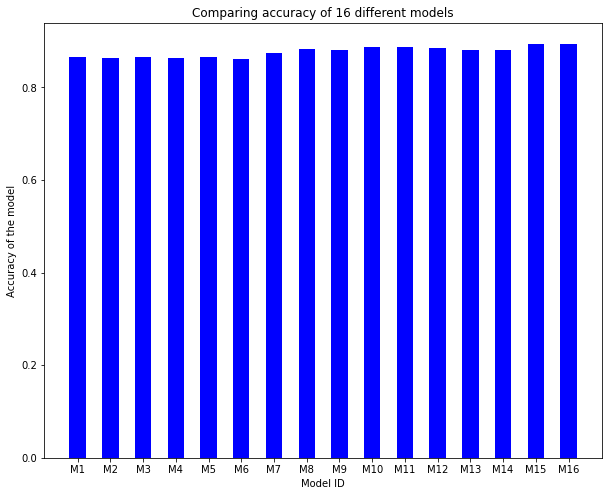

In [137]:
fig = plt.figure(figsize =(10, 8))
plt.bar(lst_name, lst_acc, color ='blue',width = 0.5)
plt.xlabel("Model ID")
plt.ylabel("Accuracy of the model")
plt.title("Comparing accuracy of 16 different models")
plt.show()

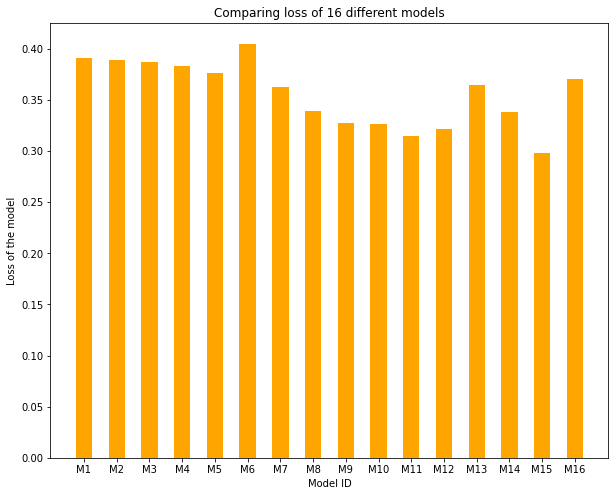

In [138]:
fig = plt.figure(figsize =(10, 8))
plt.bar(lst_name, lst_loss, color ='orange',width = 0.5)
plt.xlabel("Model ID")
plt.ylabel("Loss of the model")
plt.title("Comparing loss of 16 different models")
plt.show()

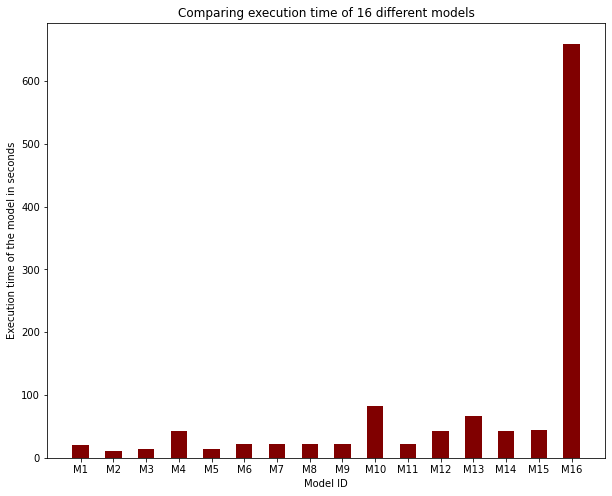

In [139]:
fig = plt.figure(figsize =(10, 8))
plt.bar(lst_name, lst_time, color ='maroon',width = 0.5)
plt.xlabel("Model ID")
plt.ylabel("Execution time of the model in seconds")
plt.title("Comparing execution time of 16 different models")
plt.show()

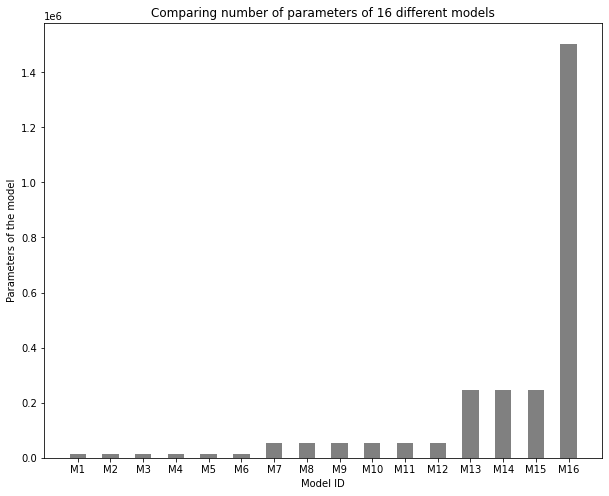

In [140]:
fig = plt.figure(figsize =(10, 8))
plt.bar(lst_name, lst_param, color ='gray',width = 0.5)
plt.xlabel("Model ID")
plt.ylabel("Parameters of the model")
plt.title("Comparing number of parameters of 16 different models")
plt.show()